# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as on thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circle
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data

In [2]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


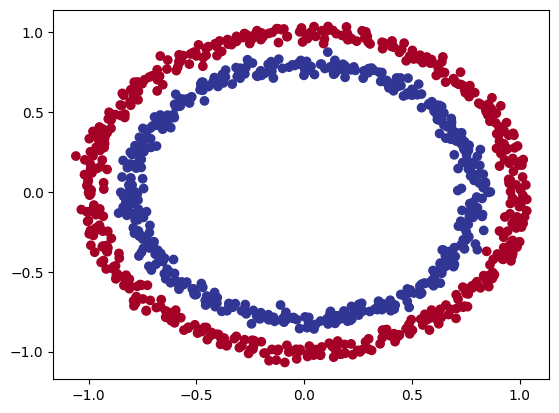

In [3]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modeling in TensorFlow:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [4]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=1), y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 0.8431 - accuracy: 0.5016
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.5013
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.5003
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.4984
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.4960


In [ ]:
# Let's try and improve our model
model_1.fit(tf.expand_dims(X, axis=1), y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.5000


[0.17344488203525543, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy.. it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932693123817444, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization fucntion such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this. time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000


[0.693881630897522, 0.5]

To visulaize our model's prediction, let's create a function 'plot_decision_boundary()', this function will:

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [5]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  """
  # Define the axis boundaries of tthe plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred =  model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


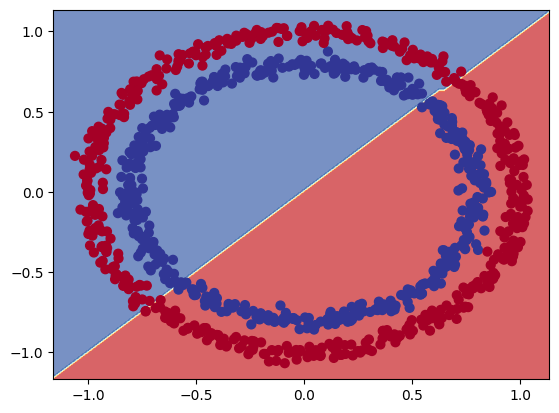

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y);

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100

# Split our reg data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit our model to the reg data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 394.3924 - mae: 394.3924
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 308.9051 - mae: 308.9051
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 225.8946 - mae: 225.8946
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 138.8604 - mae: 138.8604
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 55.9158 - mae: 55.9158
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 66.5133 - mae: 66.5133
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 73.9596 - mae: 73.9596
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 53.9904 - mae: 53.9904
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.9747 - mae: 43.9747
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.9191 - mae: 49.9191
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 8ms/step


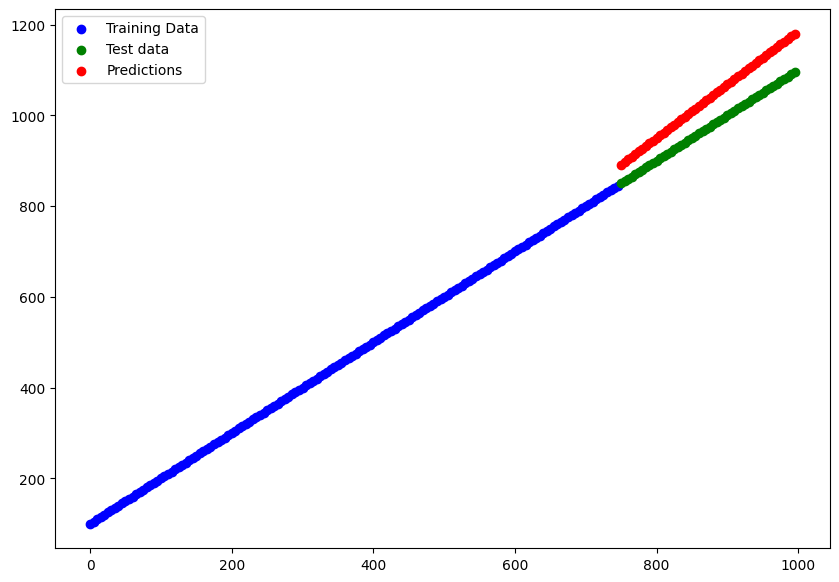

In [ ]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    ])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2786 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1913 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0903 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0162 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8774 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6692 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.5233 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2922 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9375 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0370 - accuracy: 0.5000
Epoch 11/

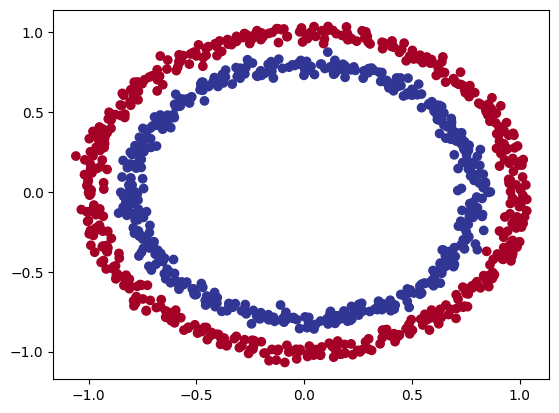

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
doing multiclass classification


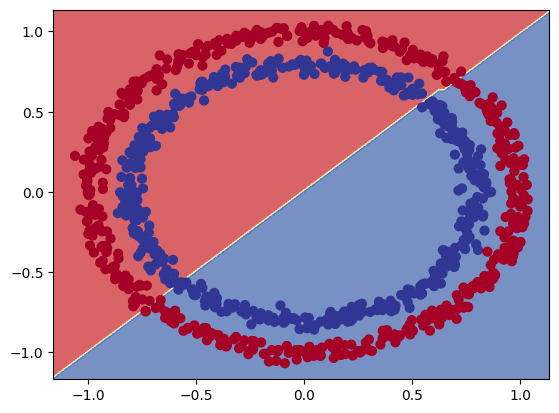

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [ ]:
# Set random Seed
tf.random.set_seed(42)

#1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3280 - accuracy: 0.4995
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1824 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2153 - accuracy: 0.4968
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1301 - accuracy: 0.4976
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1102 - accuracy: 0.4963
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0759 - accuracy: 0.4974
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0295 - accuracy: 0.4974
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8970 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8734 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7873 - accuracy: 0.4995
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=300)

Epoch 1/300
32/32 [==============================] - 2s 4ms/step - loss: 1.5157 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 1.1161 - accuracy: 0.4860
Epoch 3/300
32/32 [==============================] - 0s 4ms/step - loss: 0.9947 - accuracy: 0.4330
Epoch 4/300
32/32 [==============================] - 0s 4ms/step - loss: 0.9106 - accuracy: 0.4530
Epoch 5/300
32/32 [==============================] - 0s 4ms/step - loss: 0.8500 - accuracy: 0.4670
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 0.8102 - accuracy: 0.4730
Epoch 7/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7864 - accuracy: 0.4600
Epoch 8/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7686 - accuracy: 0.4510
Epoch 9/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.4380
Epoch 10/300
32/32 [==============================] - 0s 4ms/step - loss: 0.7466 - accuracy: 0.4160
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


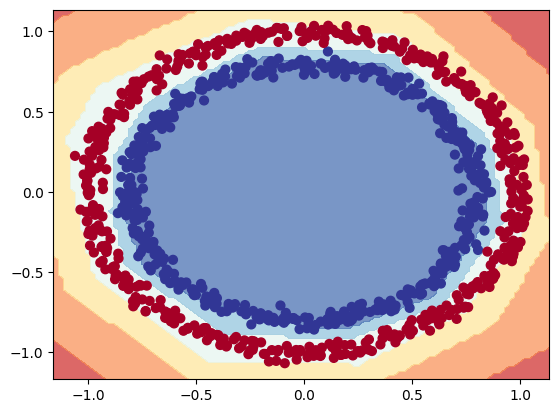

In [ ]:
# How do our model prediction look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Final Model
# set random Seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=300)

Epoch 1/300
32/32 [==============================] - 2s 6ms/step - loss: 0.6951 - accuracy: 0.5030
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5030
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5040
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5080
Epoch 5/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5110
Epoch 6/300
32/32 [==============================] - 0s 6ms/step - loss: 0.6908 - accuracy: 0.5140
Epoch 7/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5100
Epoch 8/300
32/32 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5130
Epoch 9/300
32/32 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5180
Epoch 10/300
32/32 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5210
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classification


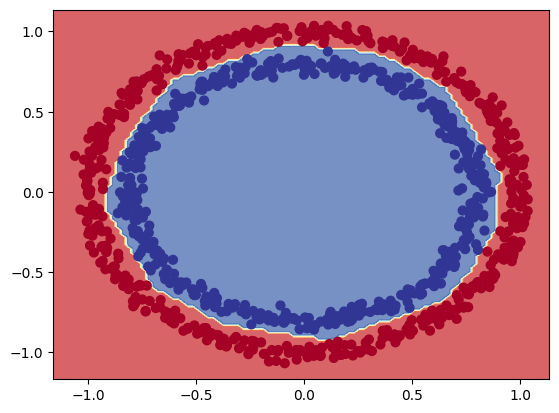

In [ ]:
# How do our model prediction looks?
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor (Similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

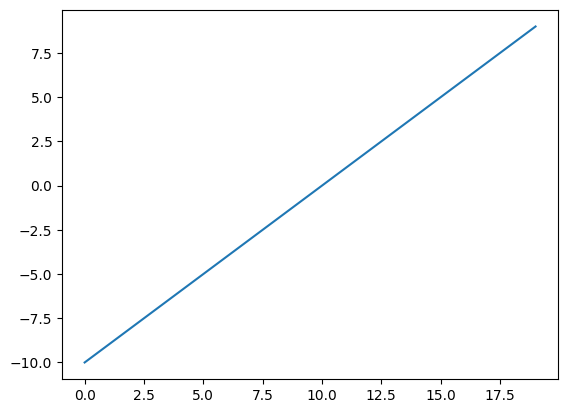

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid- sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid fucntion on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

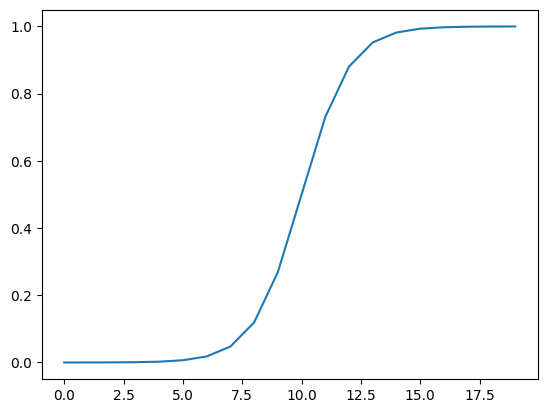

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass out toy tensor to our relu function
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

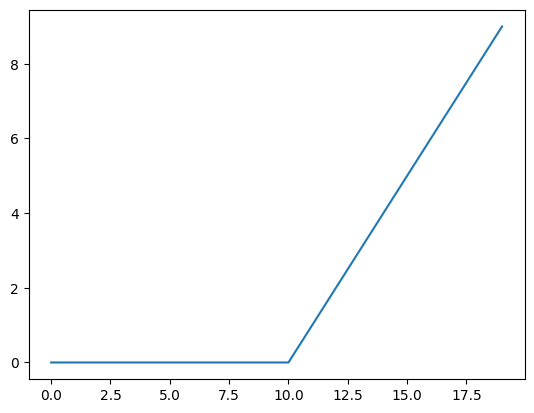

In [ ]:
# Plot relu modified tensor
plt.plot(relu(A))

## Evaluating and improving our classification

let's create a training and test set.



In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
# let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=85) 

Epoch 1/85
25/25 [==============================] - 2s 6ms/step - loss: 0.6837 - accuracy: 0.5725
Epoch 2/85
25/25 [==============================] - 0s 6ms/step - loss: 0.6691 - accuracy: 0.6425
Epoch 3/85
25/25 [==============================] - 0s 6ms/step - loss: 0.6328 - accuracy: 0.7125
Epoch 4/85
25/25 [==============================] - 0s 7ms/step - loss: 0.5391 - accuracy: 0.8188
Epoch 5/85
25/25 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8700
Epoch 6/85
25/25 [==============================] - 0s 8ms/step - loss: 0.2608 - accuracy: 0.9575
Epoch 7/85
25/25 [==============================] - 0s 7ms/step - loss: 0.1724 - accuracy: 0.9850
Epoch 8/85
25/25 [==============================] - 0s 6ms/step - loss: 0.1160 - accuracy: 0.9862
Epoch 9/85
25/25 [==============================] - 0s 6ms/step - loss: 0.0812 - accuracy: 0.9912
Epoch 10/85
25/25 [==============================] - 0s 10ms/step - loss: 0.0642 - accuracy: 0.9937
Epoch 11/85
25/25 

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9900


[0.021724659949541092, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


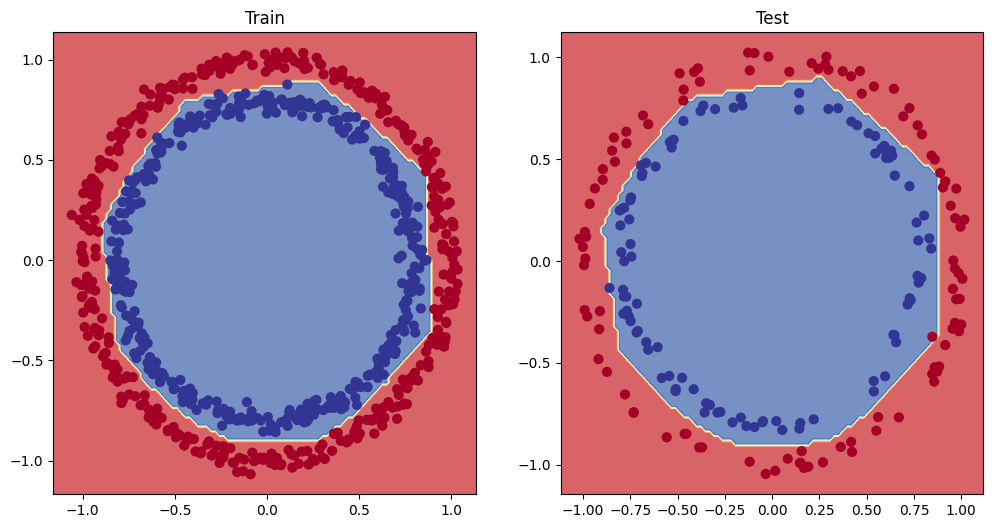

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

In [ ]:
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or taining) curve


In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.683673,0.57250
1,0.669055,0.64250
2,0.632846,0.71250
3,0.539052,0.81875
4,0.416675,0.87000
...,...,...
80,0.010051,0.99875
81,0.004285,0.99875
82,0.004209,0.99875
83,0.003375,1.00000


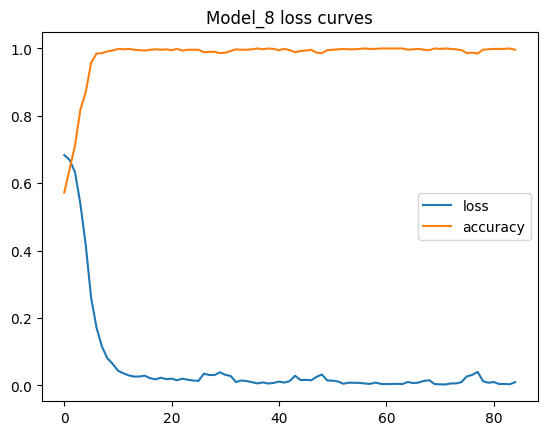

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of fucntionality, you can add to your *while*
its learning.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curve plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["Accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.7093 - Accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7088 - Accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7084 - Accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7079 - Accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7074 - Accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7069 - Accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7063 - Accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7059 - Accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

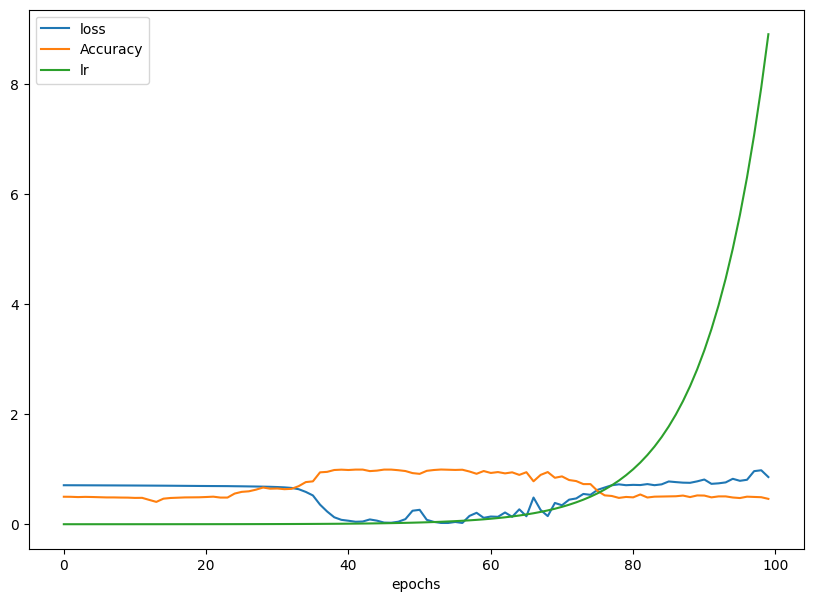

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

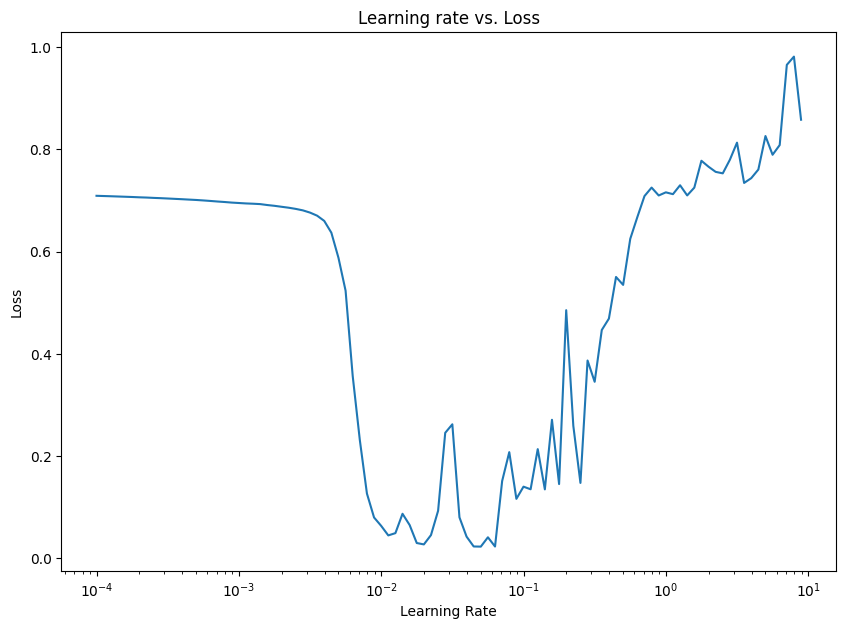

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

# 4. fit the model
history_10 = model_10.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 2s 3ms/step - loss: 0.6925 - accuracy: 0.5188
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5863
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6562
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7538
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7975
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7925
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8737
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9588
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9825
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9850
Epoch 11/15
25/25 [

In [ ]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9800


[0.06098182126879692, 0.9800000190734863]

In [ ]:
# Evaluate model 8 on the test Dataset
model_8.evaluate(X_test, y_test)

NameError: ignored

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


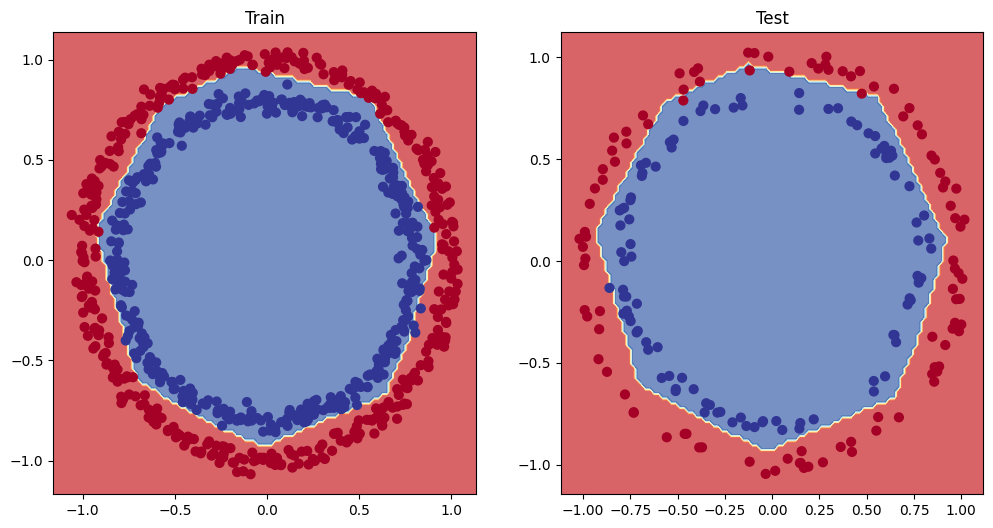

In [ ]:
# plot the decision boundaries for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing out model results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (sckit-learn)

In [ ]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.9800
Model loss on the test set: 0.06098182126879692
Model accuracy on the test set: 98.00%


How about confusion matrix?

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions(
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[98,  3],
       [ 1, 98]])

How about we prettify our confusion matrix?

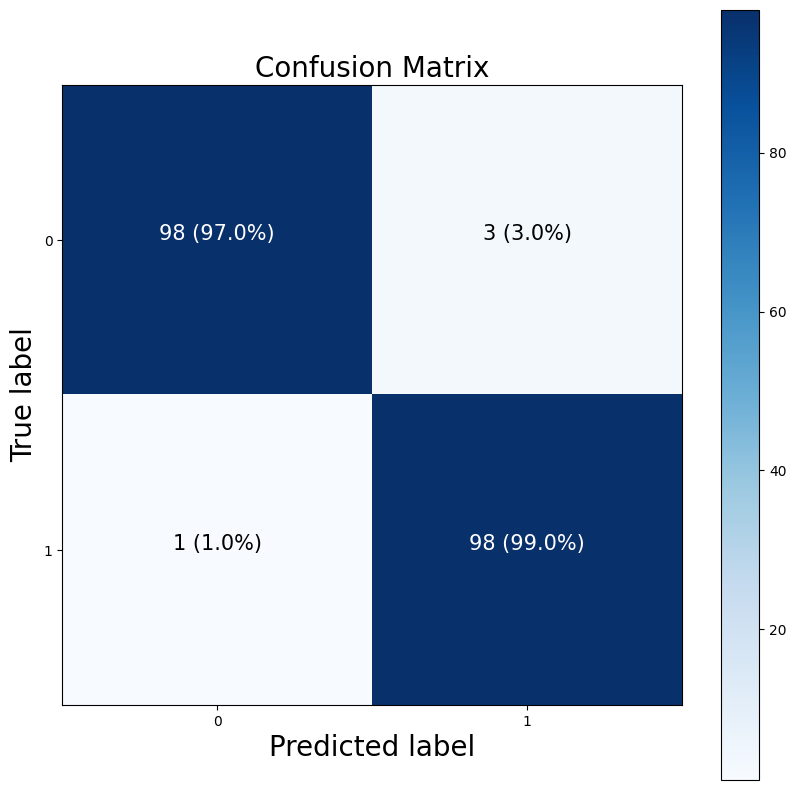

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set X-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2,

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more then two classes as an option, it's known as **multi-class classification**

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [6]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [8]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

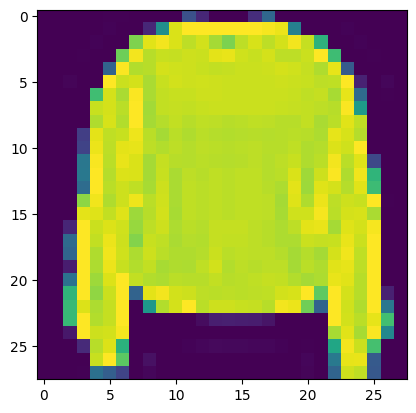

In [9]:
plt.imshow(train_data[7]);

In [10]:
# Check out smaples labels
train_labels[7]

2

In [11]:
# Create a small list so we can index onto our training labels so they're human-readable.
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_name)

10

Text(0.5, 1.0, 'Sandal')

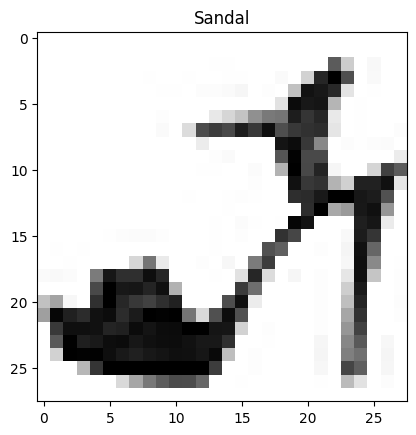

In [12]:
# Plot an axample image and its label
index_of_choice=9
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

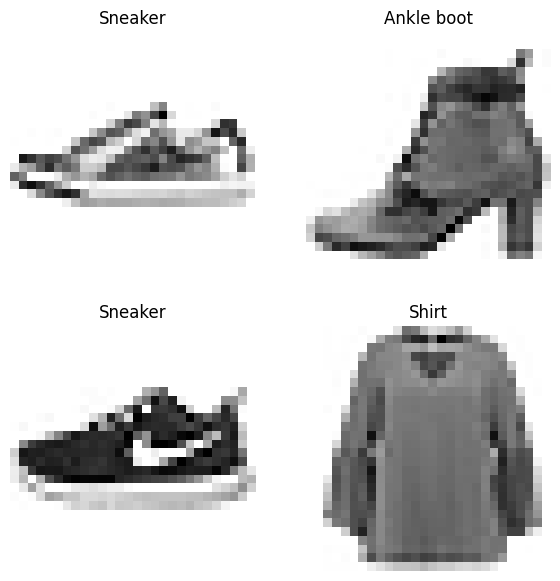

In [13]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have a tweak a few things:
* Input shape = 28 x 28 (the shape of our image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
*   If your labels are one-hot encoded, use CategoricalCrossentropy()
*   If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [14]:
# Our data needs to flattened from 28 x 28 to none x 784
flatten_model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3130 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [36]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 5)                 3925      
                                                                 
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 5)                 30        
                                                                 
 dense_28 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,045
Trainable params: 4,045
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [16]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and mac values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [65]:
# Now our data is normalized, let's build a model to find patterns in it
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2853 - accuracy: 0.5061 - val_loss: 0.9516 - val_accuracy: 0.6539
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8595 - accuracy: 0.6895 - val_loss: 0.8196 - val_accuracy: 0.7031
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7688 - accuracy: 0.7281 - val_loss: 0.7721 - val_accuracy: 0.7270
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7146 - accuracy: 0.7506 - val_loss: 0.7165 - val_accuracy: 0.7508
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6750 - accuracy: 0.7655 - val_loss: 0.6973 - val_accuracy: 0.7571
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6450 - accuracy: 0.7774 - val_loss: 0.6628 - val_accuracy: 0.7699
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6214 - accuracy: 0.7863 - val_loss: 0.6480 - val_accuracy:

**Note:** Neural network tend to prefer data in numerical form as well as scaled/normalized (number between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

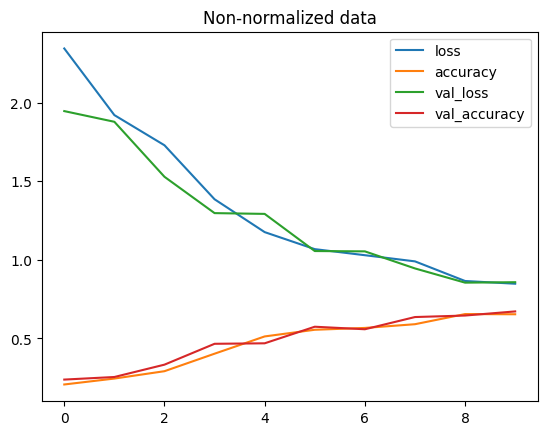

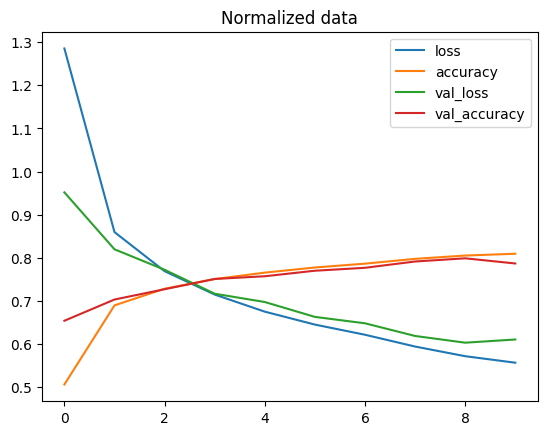

In [67]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [69]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fir the model
find_lr_history = model_13.fit(train_data_norm, 
                               train_labels, 
                               epochs=40, 
                               validation_data=(test_data_norm, test_labels), 
                               callbacks=[lr_schedular])


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6016 - accuracy: 0.3307 - val_loss: 1.3567 - val_accuracy: 0.4182 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2899 - accuracy: 0.4431 - val_loss: 1.2491 - val_accuracy: 0.4602 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9286 - accuracy: 0.6335 - val_loss: 0.7160 - val_accuracy: 0.7173 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6517 - accuracy: 0.7423 - val_loss: 0.6331 - val_accuracy: 0.7532 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6154 - accuracy: 0.7653 - val_loss: 0.6403 - val_accuracy: 0.7634 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5948 - accuracy: 0.7750 - val_loss: 0.6337 - val_accuracy: 0.7624 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 10

Text(0.5, 1.0, 'Finding the ideal learning rate')

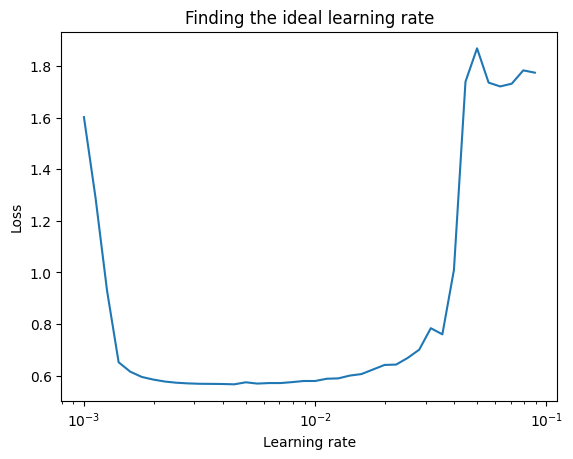

In [70]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [17]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 1.0402 - accuracy: 0.6121 - val_loss: 0.6789 - val_accuracy: 0.7645
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6211 - accuracy: 0.7810 - val_loss: 0.6064 - val_accuracy: 0.7871
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5695 - accuracy: 0.7951 - val_loss: 0.5805 - val_accuracy: 0.7917
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5444 - accuracy: 0.8036 - val_loss: 0.5653 - val_accuracy: 0.7987
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5267 - accuracy: 0.8079 - val_loss: 0.5450 - val_accuracy: 0.8043
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5112 - accuracy: 0.8123 - val_loss: 0.5440 - val_accuracy: 0.8083
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.8175 - val_loss: 0.5727 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [18]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set X-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2,

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [19]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
# Make some predictions with our model
y_probs = model_14.predict(test_data) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.99999994,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01913033, 0.        , 0.98086965,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

**Note** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data, you'll want to make predictions on nomrlaized data).

In [21]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]


array([9, 4, 1, 1, 4, 1, 4, 4, 9, 7])

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[124,  20, 694,  31,  92,   0,   5,   0,  28,   6],
       [  0, 969,   0,   6,  21,   1,   0,   0,   2,   1],
       [  0,  25, 403,   2, 562,   0,   0,   0,   8,   0],
       [  7,  69,  34, 545, 321,   0,   0,   0,  21,   3],
       [  0,  13,  10,   0, 969,   0,   0,   0,   6,   2],
       [  1,   0,   0,   2,   1, 477,   0,  42,  25, 452],
       [ 11,  11, 261,   5, 649,   3,   6,   1,  52,   1],
       [  0,   0,   0,   0,   0,   3,   0, 582,  13, 402],
       [  0,   2,   1,   3,  27,   0,   2,   4, 873,  88],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 999]])

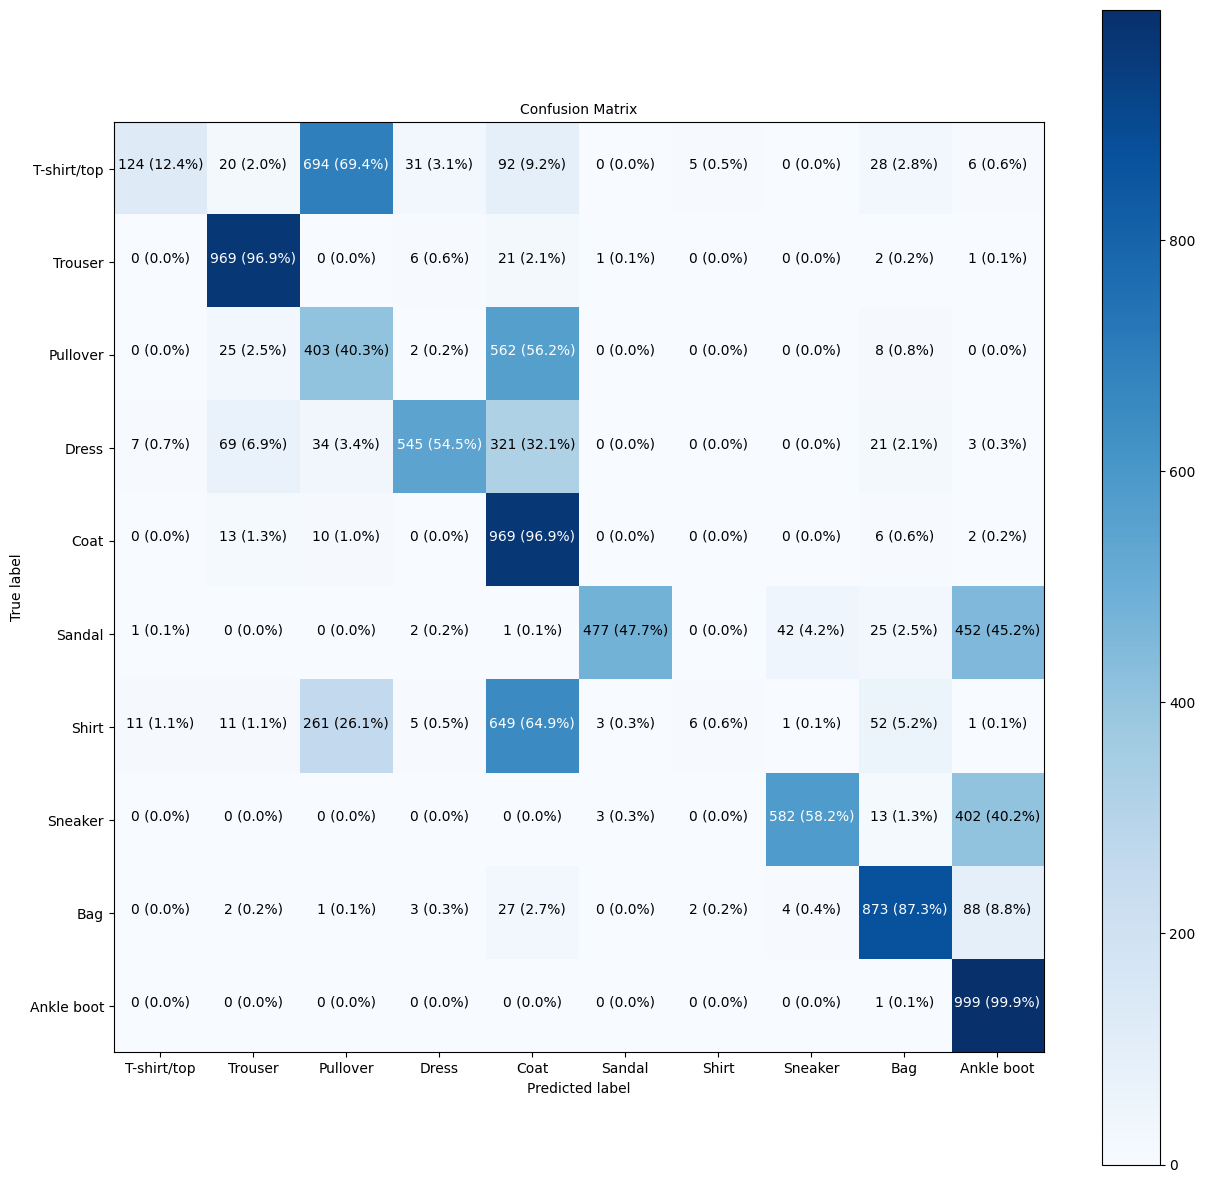

In [23]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a futher understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label

In [24]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truht labels.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Creat predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {}{:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color) # Set the color to green or red based on if prediction is right or wrong 

1/1 [==============================] - 0s 67ms/step


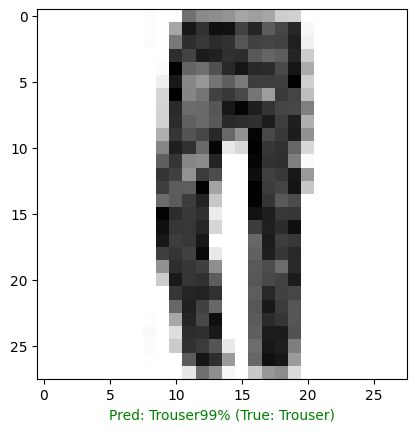

In [25]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # Alwasys make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_name)

## What patterns our model is learning?

In [26]:
# Find the layers of our recent model
model_14.layers

In [27]:
# Extract a particular layer
model_14.layers[1]

In [107]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.51809585, -0.4882895 , -0.33858117,  0.02158589, -0.20662883],
        [ 0.596967  , -0.6013299 , -0.45463762,  0.00215427,  0.3134679 ],
        [ 0.6504787 , -0.91882634, -0.7602113 ,  0.0458069 , -0.31776255],
        ...,
        [-0.14429119, -0.10844776, -0.0421479 , -0.00942886,  0.6375467 ],
        [-0.26292145, -0.12188774,  0.74834967, -0.04645675, -0.22880252],
        [ 0.30258983, -0.23904522,  0.13651665, -0.07651894, -0.23879544]],
       dtype=float32),
 (784, 5))

#  Now let's check out the bias vector...


In [108]:
# Bias and biases shapes
biases, biases.shape

(array([ 1.4026757 ,  0.5600706 ,  1.4235063 , -0.05005326,  2.1332977 ],
       dtype=float32),
 (5,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [109]:
model_14.summary();

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_96 (Dense)            (None, 5)                 3925      
                                                                 
 dense_97 (Dense)            (None, 5)                 30        
                                                                 
 dense_98 (Dense)            (None, 5)                 30        
                                                                 
 dense_99 (Dense)            (None, 10)                60        
                                                                 
Total params: 4,045
Trainable params: 4,045
Non-trainable params: 0
_________________________________________________________________


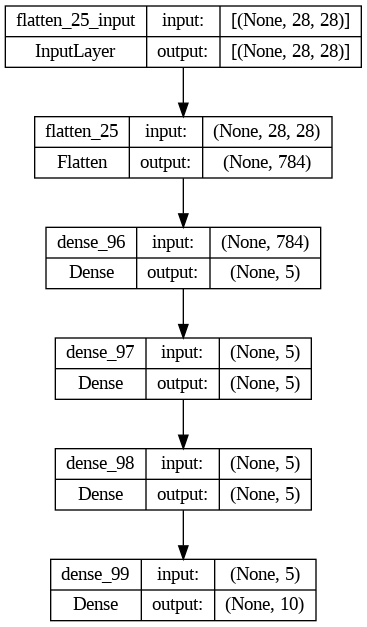

In [110]:
# let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

In [31]:
model_14.save("best_model_classification_HDF5_format.h5")

In [32]:
from google.colab import files
files.download("/content/best_model_classification_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>